In [53]:
from defisheye import Defisheye



In [54]:

dtype = 'linear'
format = 'fullframe'
fov = 180
pfov = 120

In [55]:


img = "camera.png"
img_out = f"normal.png"

In [56]:
obj = Defisheye(img, dtype=dtype, format=format, fov=fov, pfov=pfov)

# To save image locally 
obj.convert(outfile=img_out)

# To use the converted image in memory

new_image = obj.convert()

In [57]:
from torchvision.datasets import coco
from pathlib import Path
import torch, torchvision
import numpy as np
import torchvision.datasets as dset
import torchvision.transforms as transforms
from IPython.display import display
from PIL import Image, ImageDraw
from ultralytics import YOLO
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torch.utils.data import DataLoader, random_split, Subset

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

device

device(type='cpu')

In [58]:
# matplotlib.use('Agg')
%matplotlib inline 
# total_plots = 3 
# fig, axes = plt.subplots(1, total_plots, figsize=(6 * total_plots, 7))



In [59]:
def draw_bounding_box(ax, bounding_box, text, color):
    x1, y1, w, h = bounding_box
    rect = patches.Rectangle((x1, y1), w, h, linewidth=2, edgecolor=color, facecolor='none')
    ax.add_patch(rect)
    ax.text(x1, y1 - 10, text,
            color=color, fontsize=8, weight='bold',
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=0.5))

In [60]:
def draw_bounding_box_yolo(ax, model_name, results):
    
    images = []
    colors = [
        "red", "green", "blue", "purple", "orange", "cyan", "magenta", "yellow", "lime", "pink"
    ]
    for i in range(len(results)):
        result = results[i]
        boxes = result.boxes.xyxy.cpu().numpy()
        scores = result.boxes.conf.cpu().numpy()
        class_ids = result.boxes.cls.cpu().numpy()
        names = result.names 
        ax.imshow(Image.fromarray(result.orig_img))
        ax.set_title(f"{model_name}")
        ax.axis('off')

        for i in range(len(boxes)):
            x1, y1, x2, y2 = boxes[i]
            
            score = scores[i]
            class_id = int(class_ids[i])
            class_name = names[class_id]
            color = colors[class_id % len(colors)]
            # draw.rectangle((x1, y1, x2, y2), outline=color)
            text = f"{class_name} {score:.2f}"
            draw_bounding_box(ax, [x1, y1, x2 - x1, y2 - y1], text, color)
            # draw.text((x1, y1 - 10), text, fill=color)
            
            print(f"  Object {i+1}:")
            print(f"    Class: {class_name} (ID: {class_id})")
            print(f"    Confidence: {score:.2f}")
            print(f"    Bounding Box: [x1={x1:.0f}, y1={y1:.0f}, x2={x2:.0f}, y2={y2:.0f}]")
            images.append(ax)
    return images

In [61]:
dataset_path = Path('data')
train_images, train_ann = f"{dataset_path}/train/images", f"{dataset_path}/train/train.json"
test_images, test_ann = f"{dataset_path}/test/images", f"{dataset_path}/test/test.json"

In [62]:
train_dataset = coco.CocoDetection(train_images, annFile=train_ann)
test_dataset = coco.CocoDetection(test_images, annFile=test_ann)
# cap = dset.CocoCaptions(root = train_images, annFile = train_ann, transform=transforms.PILToTensor())


loading annotations into memory...
Done (t=0.17s)
creating index...
index created!
loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


In [63]:

img, labels = train_dataset[0]

print("Image Size: ", img)
print(labels)


Image Size:  <PIL.Image.Image image mode=RGB size=1225x1088 at 0x75E9E6C342D0>
[{'id': 27700, 'image_id': 310, 'category_id': 1, 'bbox': [145, 343, 74, 108], 'area': 7992, 'iscrowd': 0}, {'id': 27701, 'image_id': 310, 'category_id': 1, 'bbox': [684, 295, 55, 51], 'area': 2805, 'iscrowd': 0}, {'id': 27702, 'image_id': 310, 'category_id': 1, 'bbox': [561, 676, 128, 150], 'area': 19200, 'iscrowd': 0}, {'id': 27703, 'image_id': 310, 'category_id': 1, 'bbox': [803, 416, 66, 64], 'area': 4224, 'iscrowd': 0}, {'id': 27704, 'image_id': 310, 'category_id': 1, 'bbox': [996, 682, 61, 56], 'area': 3416, 'iscrowd': 0}, {'id': 27705, 'image_id': 310, 'category_id': 1, 'bbox': [1057, 743, 43, 39], 'area': 1677, 'iscrowd': 0}, {'id': 27706, 'image_id': 310, 'category_id': 2, 'bbox': [380, 173, 62, 37], 'area': 2294, 'iscrowd': 0}, {'id': 27707, 'image_id': 310, 'category_id': 2, 'bbox': [410, 139, 56, 30], 'area': 1680, 'iscrowd': 0}, {'id': 27708, 'image_id': 310, 'category_id': 2, 'bbox': [934, 450,

In [64]:
# coco_detection = coco.CocoDetection()
# train_dataset.coco.annToMask()?
# draw_image = img.copy()
# draw = ImageDraw.Draw(draw_image)
# colors = [
#         "red", "green", "blue", "purple", "orange", "cyan", "magenta", "yellow", "lime", "pink"
#     ]
# classes = ["Bus", "Bike", "Car", "Pedestrian", "Truck"]

# # a = target[0]
# # print('A: ', a)
# axes[0].imshow(img)
# axes[0].set_title("Original Image (Ground Truth)")
# axes[0].axis('off')
# for label in labels:
#     print(f"label: {label}")

    
#     bbox = label['bbox']
#     class_name = classes[label['category_id']]
#     color = colors[label['category_id'] % len(colors)]
#     text = f"{class_name}"
#     draw_bounding_box(axes[0], bbox, text, color)
# display(draw_image)


In [65]:
# model = torch.hub.load("ultralytics/yolov8", "yolov8s")
# model = YOLO("yolov8m.pt", task='detect')
# model.to(device)


In [66]:
# results = model(img, device=device)  # batch of images
# print(f"results: {results}")
# # results.print()
# results.show()

In [67]:
# images = draw_bounding_box_yolo(ax=axes[1], model_name='yolov8m', results=results)
# display(images[0], draw_image)


In [68]:
# model = YOLO("yolo11m.pt", task='detect')


In [69]:

# results = model(img, device=device)  # batch of images
# print(f"results: {results}")
# # results.print()
# results.show() 

In [70]:
# images = draw_bounding_box_yolo(ax=axes[2], model_name='yolo11m', results=results)


In [71]:
def collate_fn(batch):
    images = [item[0] for item in batch]
    targets = [item[1] for item in batch]
    return images, targets

In [72]:
# display(fig)
# plt.close(fig)

In [73]:
SAMPLE_SIZE = 10
sample_loader = DataLoader(train_dataset, batch_size=SAMPLE_SIZE, shuffle=True, collate_fn=collate_fn)
sample_images_pil, sample_labels_gt = next(iter(sample_loader))
sample_images_np = [np.array(img) for img in sample_images_pil]

sample_images_pil



[<PIL.Image.Image image mode=RGB size=1920x1920>,
 <PIL.Image.Image image mode=RGB size=1230x1088>,
 <PIL.Image.Image image mode=RGB size=1920x1088>,
 <PIL.Image.Image image mode=RGB size=1230x1088>,
 <PIL.Image.Image image mode=RGB size=1920x1920>,
 <PIL.Image.Image image mode=RGB size=1240x1088>,
 <PIL.Image.Image image mode=RGB size=1240x1088>,
 <PIL.Image.Image image mode=RGB size=1920x1088>,
 <PIL.Image.Image image mode=RGB size=1280x1280>,
 <PIL.Image.Image image mode=RGB size=1920x1920>]

In [74]:
models = [
    {'name': 'yolov5s', 'obj': YOLO("yolov5s.pt", task='detect').to(device)},
    {'name': 'yolov8m', 'obj': YOLO("yolov8m.pt", task='detect').to(device)},
    {'name': 'yolo11m', 'obj': YOLO("yolo11m.pt", task='detect').to(device)},
    {'name': 'yolov8s', 'obj': YOLO("yolov8s.pt", task='detect').to(device)},
    {'name': 'yolov8n', 'obj': YOLO("yolov8n.pt", task='detect').to(device)},
    {'name': 'yolov8l', 'obj': YOLO("yolov8l.pt", task='detect').to(device)},
    {'name': 'yolov9c', 'obj': YOLO("yolov9c.pt", task='detect').to(device)},
    {'name': 'yolov10m', 'obj': YOLO("yolov10m.pt", task='detect').to(device)}
]


PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [75]:
colors = [
        "red", "green", "blue", "purple", "orange", "cyan", "magenta", "yellow", "lime", "pink"
    ]
classes = ["Bus", "Bike", "Car", "Pedestrian", "Truck"]

# a = target[0]
# print('A: ', a)

In [ ]:
for model in models:
    print(f"{model['name']} on device: {model['obj'].device}")
    results = model['obj'](sample_images_np, device=device)
    model['results'] = results
    print(f"{model['name']} inference done. First image shape: {results[0].orig_img.shape}")

    # results_list.append({'model': model['name'], 'results': results})

    

yolov5s on device: cpu

0: 640x640 1 person, 1 car, 1 airplane, 158.1ms
1: 640x640 5 persons, 2 cars, 158.1ms
2: 640x640 (no detections), 158.1ms
3: 640x640 1 car, 1 airplane, 158.1ms
4: 640x640 1 person, 3 cars, 1 motorcycle, 1 bus, 1 truck, 4 boats, 158.1ms
5: 640x640 1 clock, 158.1ms
6: 640x640 1 car, 1 bus, 1 truck, 158.1ms
7: 640x640 4 persons, 158.1ms
8: 640x640 1 person, 1 airplane, 1 toothbrush, 158.1ms
9: 640x640 1 car, 1 airplane, 158.1ms
Speed: 4.4ms preprocess, 158.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
yolov5s inference done. First image shape: (1920, 1920, 3)
yolov8m on device: cpu

0: 640x640 2 persons, 1 motorcycle, 2 airplanes, 336.1ms
1: 640x640 7 persons, 5 cars, 1 motorcycle, 336.1ms
2: 640x640 3 persons, 336.1ms
3: 640x640 2 cars, 336.1ms
4: 640x640 5 persons, 5 cars, 3 motorcycles, 1 airplane, 2 buss, 1 truck, 1 boat, 336.1ms
5: 640x640 1 car, 336.1ms
6: 640x640 2 cars, 1 bus, 336.1ms
7: 640x640 7 persons, 1 bicycle, 1 bench, 336.1ms


In [77]:

total_plots = len(models) + 1
models

[{'name': 'yolov5s',
  'obj': YOLO(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
        

i: 0
label: {'id': 110947, 'image_id': 131574, 'category_id': 2, 'bbox': [1875, 915, 31, 39], 'area': 1209, 'iscrowd': 0}
label: {'id': 110948, 'image_id': 131574, 'category_id': 2, 'bbox': [1856, 879, 39, 59], 'area': 2301, 'iscrowd': 0}
label: {'id': 110949, 'image_id': 131574, 'category_id': 2, 'bbox': [1683, 419, 46, 34], 'area': 1564, 'iscrowd': 0}
label: {'id': 110950, 'image_id': 131574, 'category_id': 3, 'bbox': [1643, 297, 27, 20], 'area': 540, 'iscrowd': 0}
label: {'id': 110951, 'image_id': 131574, 'category_id': 1, 'bbox': [98, 528, 26, 35], 'area': 910, 'iscrowd': 0}
label: {'id': 110952, 'image_id': 131574, 'category_id': 1, 'bbox': [39, 586, 29, 36], 'area': 1044, 'iscrowd': 0}
label: {'id': 110953, 'image_id': 131574, 'category_id': 3, 'bbox': [1860, 1071, 26, 18], 'area': 468, 'iscrowd': 0}
label: {'id': 110954, 'image_id': 131574, 'category_id': 1, 'bbox': [1809, 1189, 37, 23], 'area': 851, 'iscrowd': 0}
label: {'id': 110955, 'image_id': 131574, 'category_id': 1, 'bbox

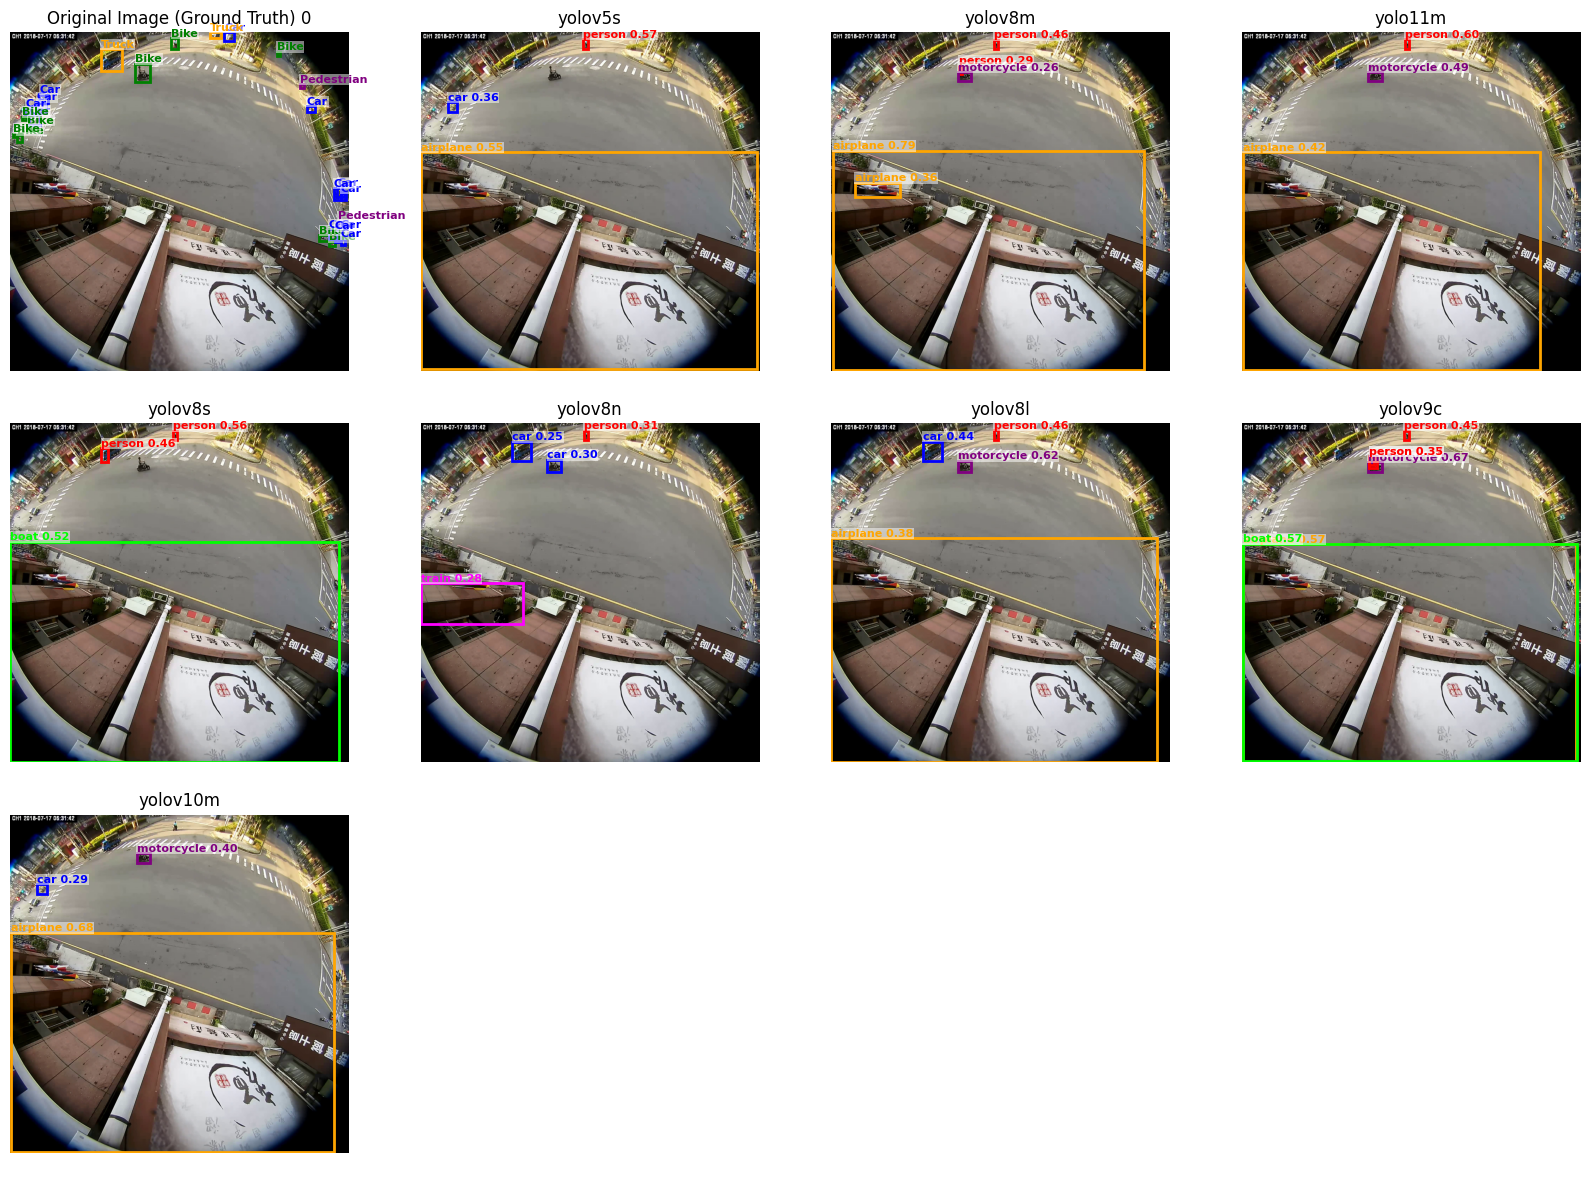

i: 1
label: {'id': 50084, 'image_id': 81472, 'category_id': 1, 'bbox': [524, 188, 31, 39], 'area': 1209, 'iscrowd': 0}
label: {'id': 50085, 'image_id': 81472, 'category_id': 3, 'bbox': [746, 221, 28, 58], 'area': 1624, 'iscrowd': 0}
label: {'id': 50086, 'image_id': 81472, 'category_id': 3, 'bbox': [718, 230, 29, 59], 'area': 1711, 'iscrowd': 0}
label: {'id': 50087, 'image_id': 81472, 'category_id': 3, 'bbox': [775, 255, 32, 77], 'area': 2464, 'iscrowd': 0}
label: {'id': 50088, 'image_id': 81472, 'category_id': 1, 'bbox': [497, 208, 29, 45], 'area': 1305, 'iscrowd': 0}
label: {'id': 50089, 'image_id': 81472, 'category_id': 1, 'bbox': [652, 224, 37, 62], 'area': 2294, 'iscrowd': 0}
label: {'id': 50090, 'image_id': 81472, 'category_id': 1, 'bbox': [330, 544, 90, 128], 'area': 11520, 'iscrowd': 0}
label: {'id': 50091, 'image_id': 81472, 'category_id': 2, 'bbox': [574, 340, 206, 186], 'area': 38316, 'iscrowd': 0}
label: {'id': 50092, 'image_id': 81472, 'category_id': 2, 'bbox': [246, 319, 5

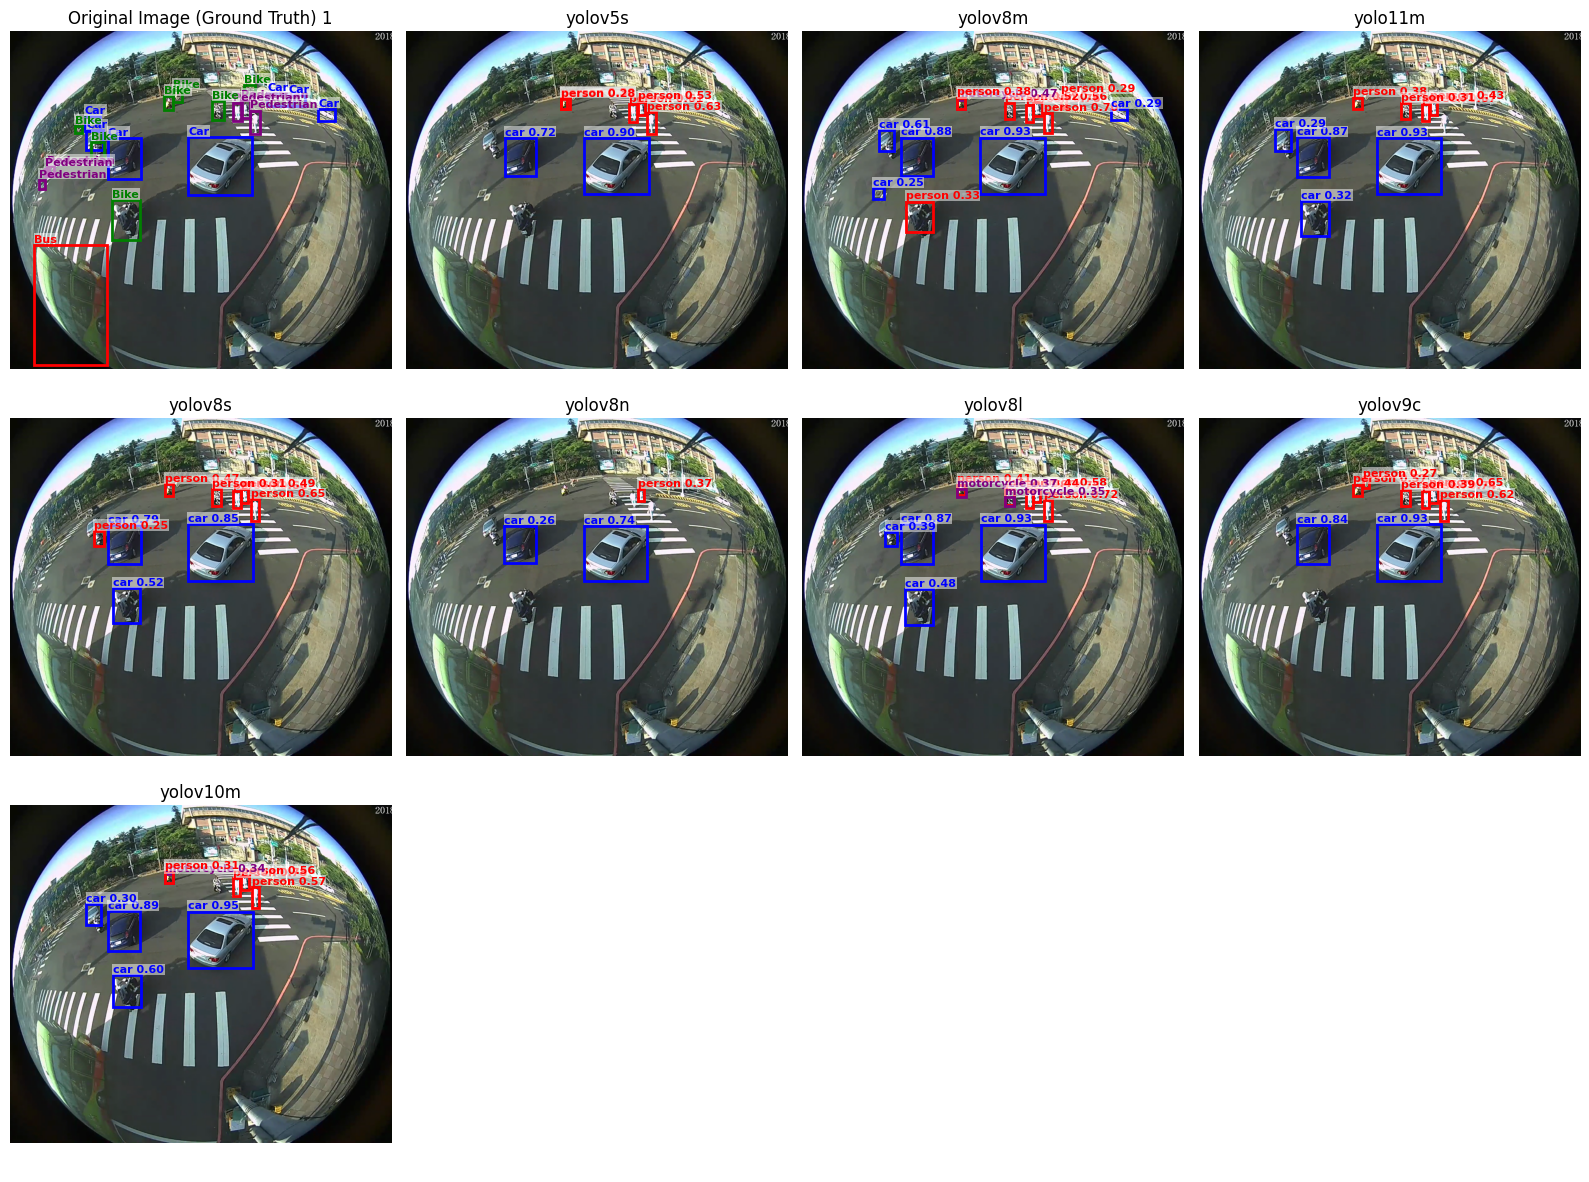

i: 2
label: {'id': 107050, 'image_id': 141522, 'category_id': 1, 'bbox': [1278, 49, 58, 58], 'area': 3364, 'iscrowd': 0}
label: {'id': 107051, 'image_id': 141522, 'category_id': 1, 'bbox': [1243, 28, 54, 53], 'area': 2862, 'iscrowd': 0}
label: {'id': 107052, 'image_id': 141522, 'category_id': 1, 'bbox': [1613, 540, 75, 69], 'area': 5175, 'iscrowd': 0}
label: {'id': 107053, 'image_id': 141522, 'category_id': 1, 'bbox': [176, 908, 70, 119], 'area': 8330, 'iscrowd': 0}
label: {'id': 107054, 'image_id': 141522, 'category_id': 1, 'bbox': [64, 870, 59, 106], 'area': 6254, 'iscrowd': 0}
label: {'id': 107055, 'image_id': 141522, 'category_id': 2, 'bbox': [114, 252, 64, 78], 'area': 4992, 'iscrowd': 0}
label: {'id': 107056, 'image_id': 141522, 'category_id': 2, 'bbox': [1497, 96, 91, 83], 'area': 7553, 'iscrowd': 0}
label: {'id': 107057, 'image_id': 141522, 'category_id': 2, 'bbox': [1, 585, 40, 76], 'area': 3040, 'iscrowd': 0}
label: {'id': 107058, 'image_id': 141522, 'category_id': 1, 'bbox':

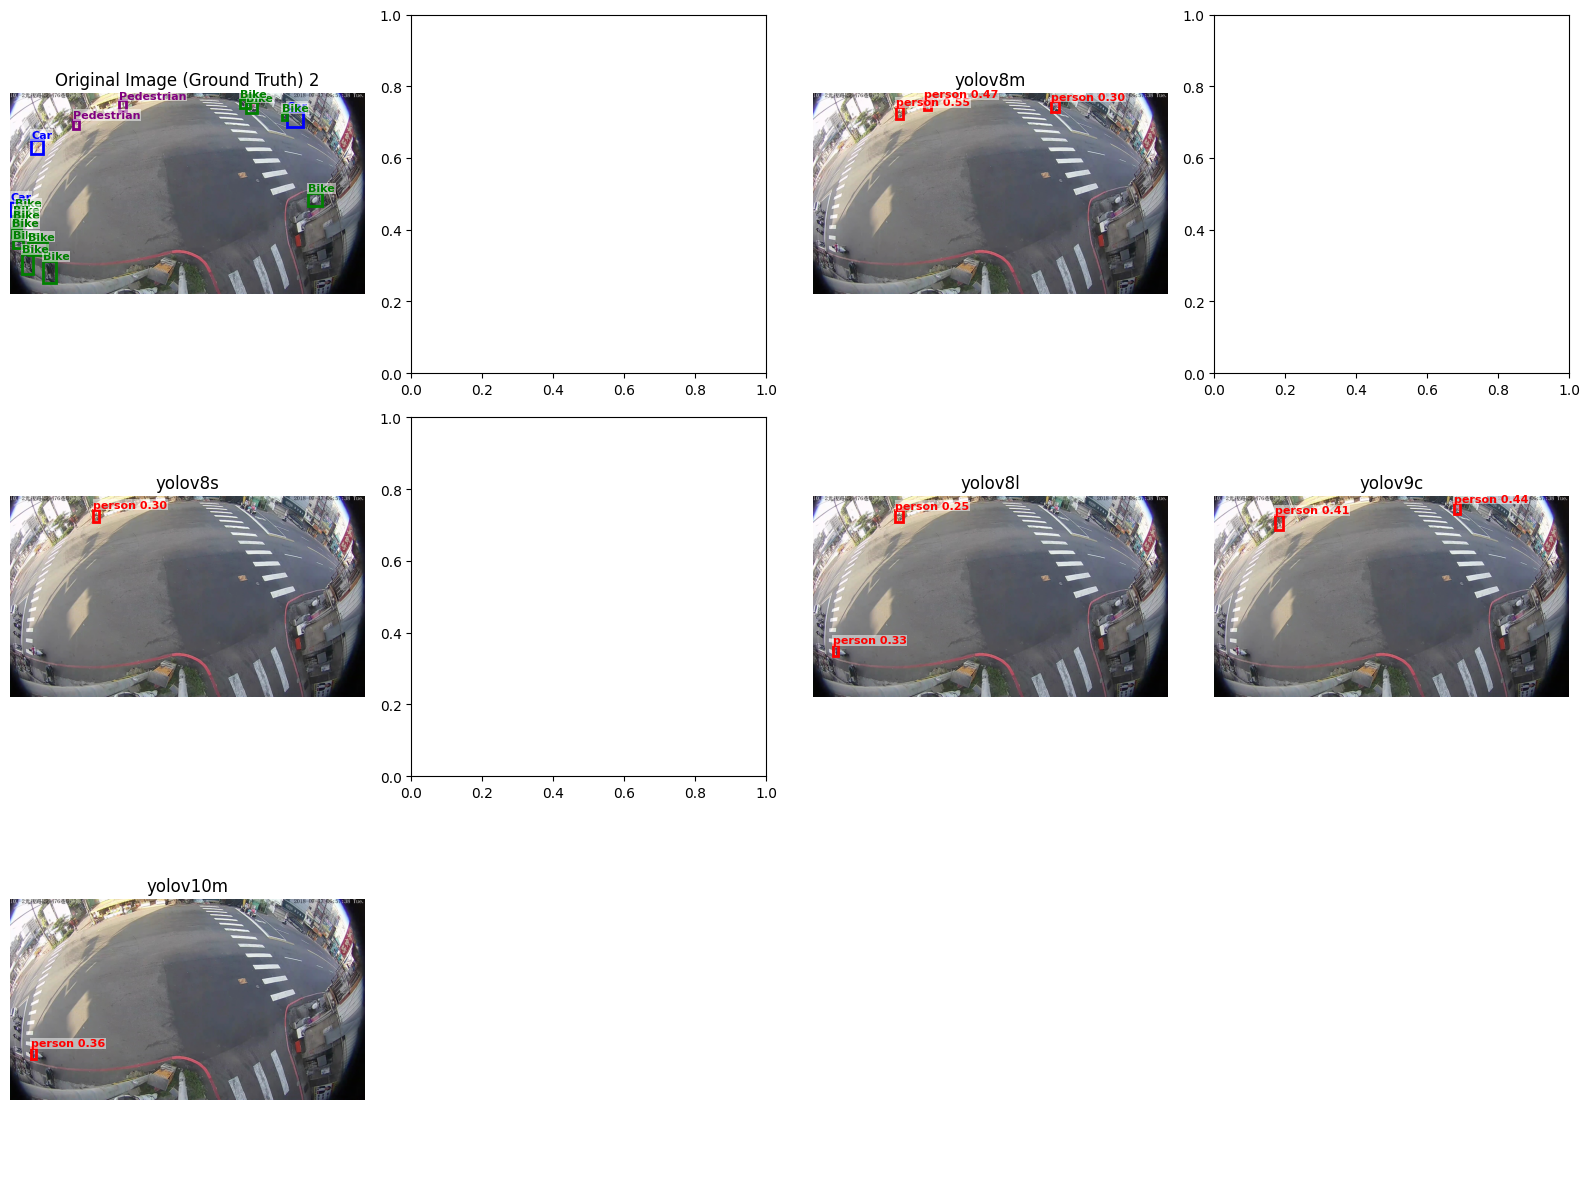

i: 3
label: {'id': 96402, 'image_id': 81184, 'category_id': 3, 'bbox': [1130, 635, 43, 60], 'area': 2580, 'iscrowd': 0}
label: {'id': 96403, 'image_id': 81184, 'category_id': 3, 'bbox': [1141, 520, 38, 50], 'area': 1900, 'iscrowd': 0}
label: {'id': 96404, 'image_id': 81184, 'category_id': 2, 'bbox': [788, 201, 102, 50], 'area': 5100, 'iscrowd': 0}
label: {'id': 96405, 'image_id': 81184, 'category_id': 1, 'bbox': [573, 169, 25, 34], 'area': 850, 'iscrowd': 0}
label: {'id': 96406, 'image_id': 81184, 'category_id': 2, 'bbox': [552, 181, 112, 52], 'area': 5824, 'iscrowd': 0}
label: {'id': 96407, 'image_id': 81184, 'category_id': 1, 'bbox': [605, 165, 24, 25], 'area': 600, 'iscrowd': 0}
label: {'id': 96408, 'image_id': 81184, 'category_id': 1, 'bbox': [635, 168, 23, 27], 'area': 621, 'iscrowd': 0}
label: {'id': 96409, 'image_id': 81184, 'category_id': 2, 'bbox': [912, 232, 78, 41], 'area': 3198, 'iscrowd': 0}
label: {'id': 96410, 'image_id': 81184, 'category_id': 1, 'bbox': [815, 177, 41, 3

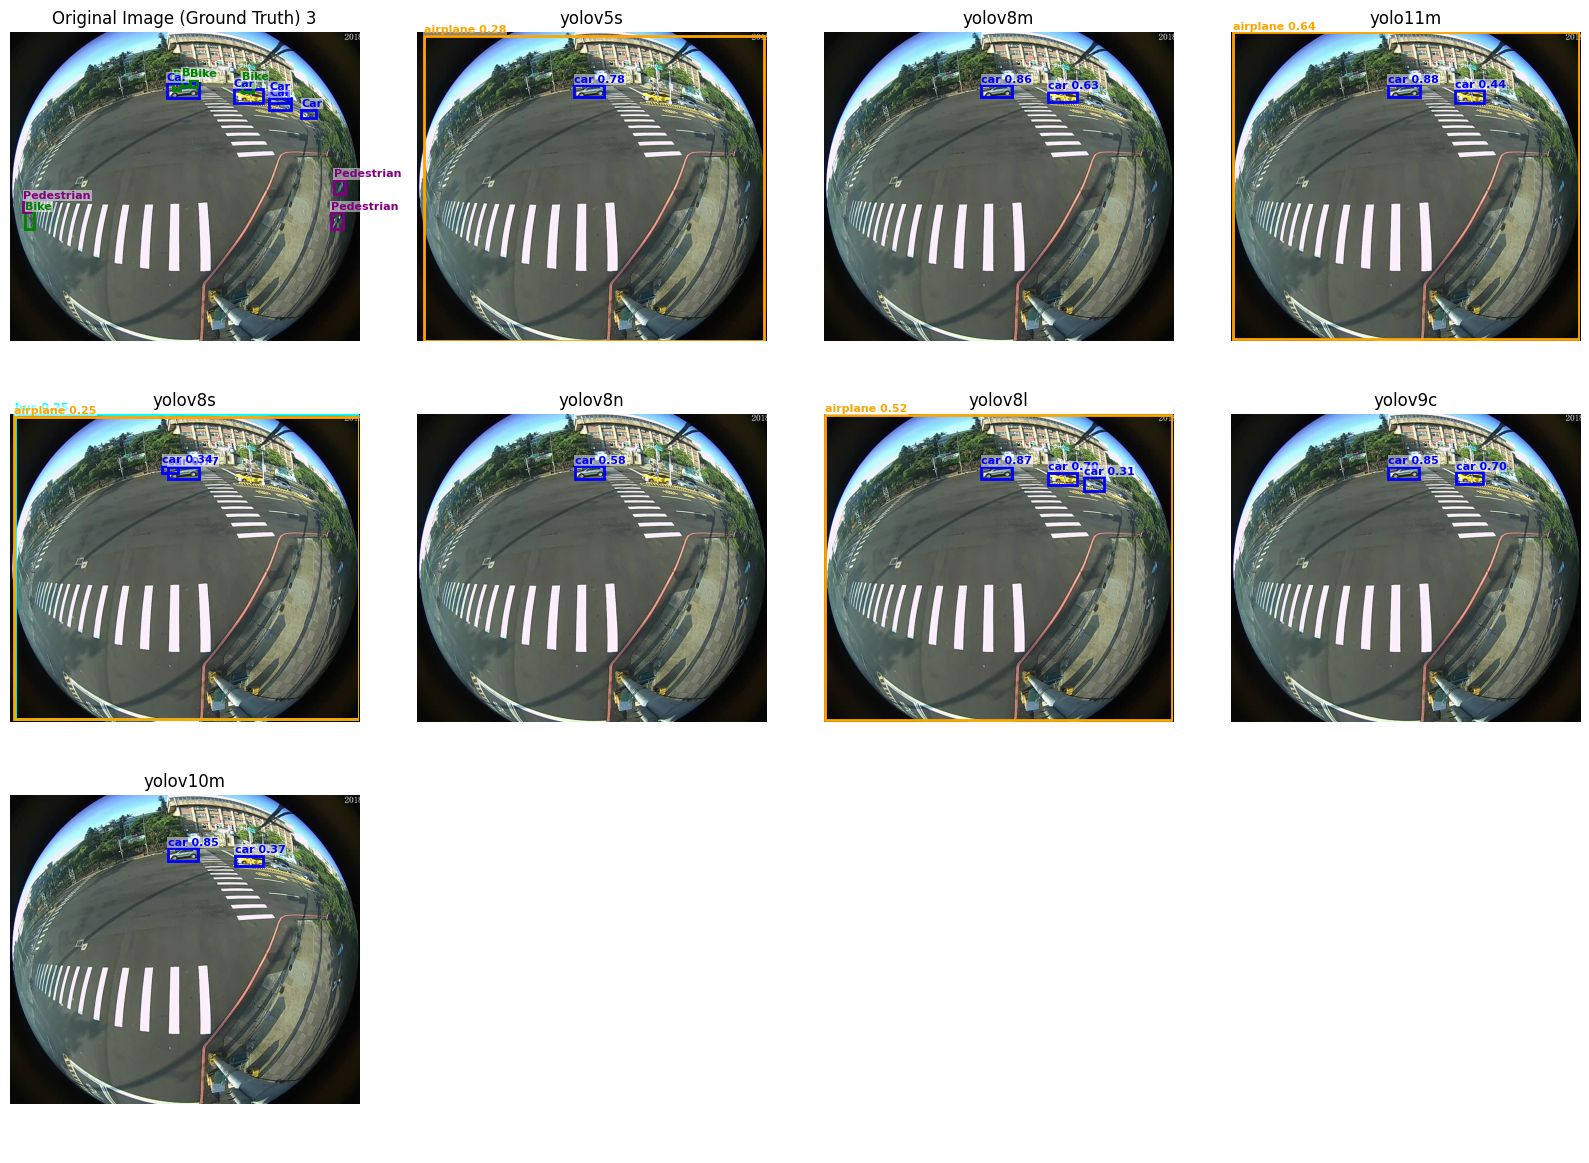

i: 4
label: {'id': 20421, 'image_id': 131714, 'category_id': 2, 'bbox': [1684, 421, 39, 35], 'area': 1365, 'iscrowd': 0}
label: {'id': 20422, 'image_id': 131714, 'category_id': 2, 'bbox': [1063, 7, 69, 59], 'area': 4071, 'iscrowd': 0}
label: {'id': 20423, 'image_id': 131714, 'category_id': 3, 'bbox': [156, 668, 60, 28], 'area': 1680, 'iscrowd': 0}
label: {'id': 20424, 'image_id': 131714, 'category_id': 3, 'bbox': [126, 653, 35, 19], 'area': 665, 'iscrowd': 0}
label: {'id': 20425, 'image_id': 131714, 'category_id': 3, 'bbox': [138, 674, 35, 18], 'area': 630, 'iscrowd': 0}
label: {'id': 20426, 'image_id': 131714, 'category_id': 1, 'bbox': [1559, 327, 37, 49], 'area': 1813, 'iscrowd': 0}
label: {'id': 20427, 'image_id': 131714, 'category_id': 1, 'bbox': [1400, 347, 70, 90], 'area': 6300, 'iscrowd': 0}
label: {'id': 20428, 'image_id': 131714, 'category_id': 1, 'bbox': [1040, 580, 134, 104], 'area': 13936, 'iscrowd': 0}
label: {'id': 20429, 'image_id': 131714, 'category_id': 1, 'bbox': [100

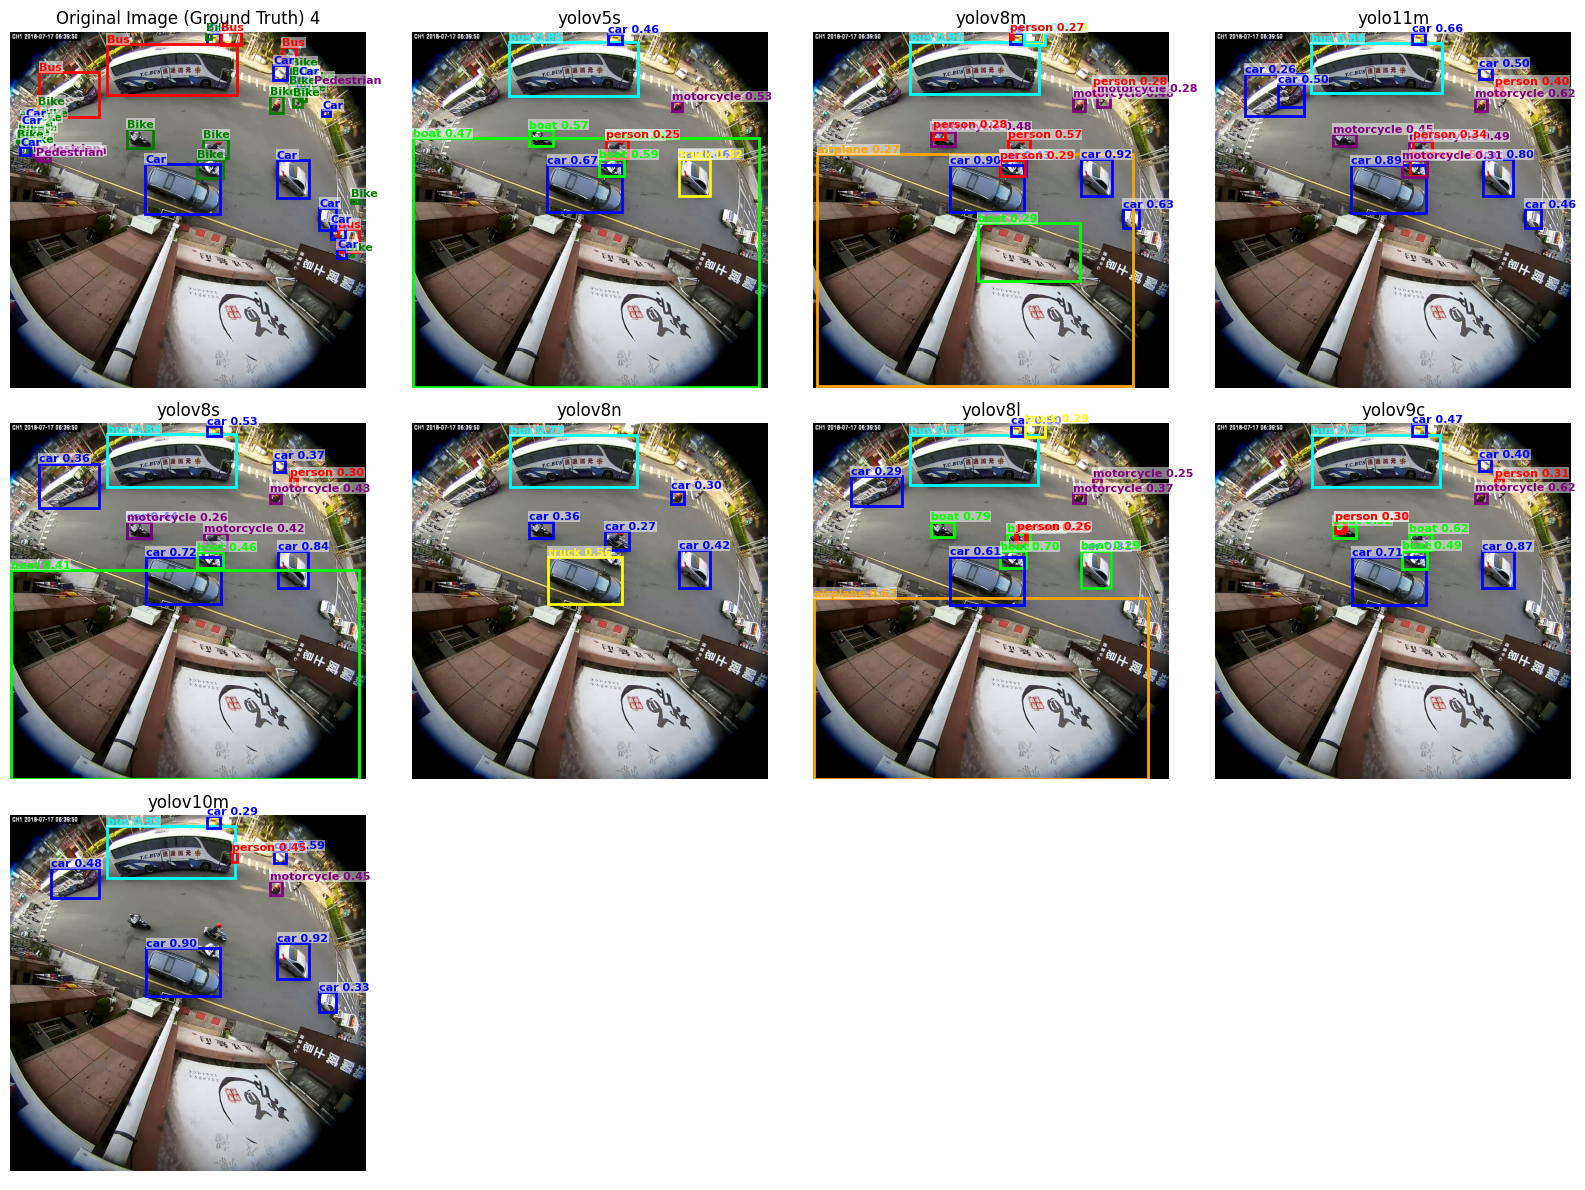

i: 5
label: {'id': 91151, 'image_id': 110256, 'category_id': 2, 'bbox': [685, 925, 187, 162], 'area': 30294, 'iscrowd': 0}
label: {'id': 91152, 'image_id': 110256, 'category_id': 2, 'bbox': [585, 85, 48, 45], 'area': 2160, 'iscrowd': 0}
label: {'id': 91153, 'image_id': 110256, 'category_id': 1, 'bbox': [120, 550, 61, 105], 'area': 6405, 'iscrowd': 0}
label: {'id': 91154, 'image_id': 110256, 'category_id': 2, 'bbox': [30, 509, 23, 56], 'area': 1288, 'iscrowd': 0}
label: {'id': 91155, 'image_id': 110256, 'category_id': 0, 'bbox': [93, 815, 265, 271], 'area': 71815, 'iscrowd': 0}
label: {'id': 91156, 'image_id': 110256, 'category_id': 1, 'bbox': [1083, 846, 48, 65], 'area': 3120, 'iscrowd': 0}
  Object 1:
    Class: clock (ID: 74)
    Confidence: 0.34
    Bounding Box: [x1=14, y1=5, x2=1236, y2=1088]
  Object 1:
    Class: car (ID: 2)
    Confidence: 0.42
    Bounding Box: [x1=569, y1=84, x2=627, y2=129]
  Object 1:
    Class: clock (ID: 74)
    Confidence: 0.45
    Bounding Box: [x1=10, 

KeyboardInterrupt: 

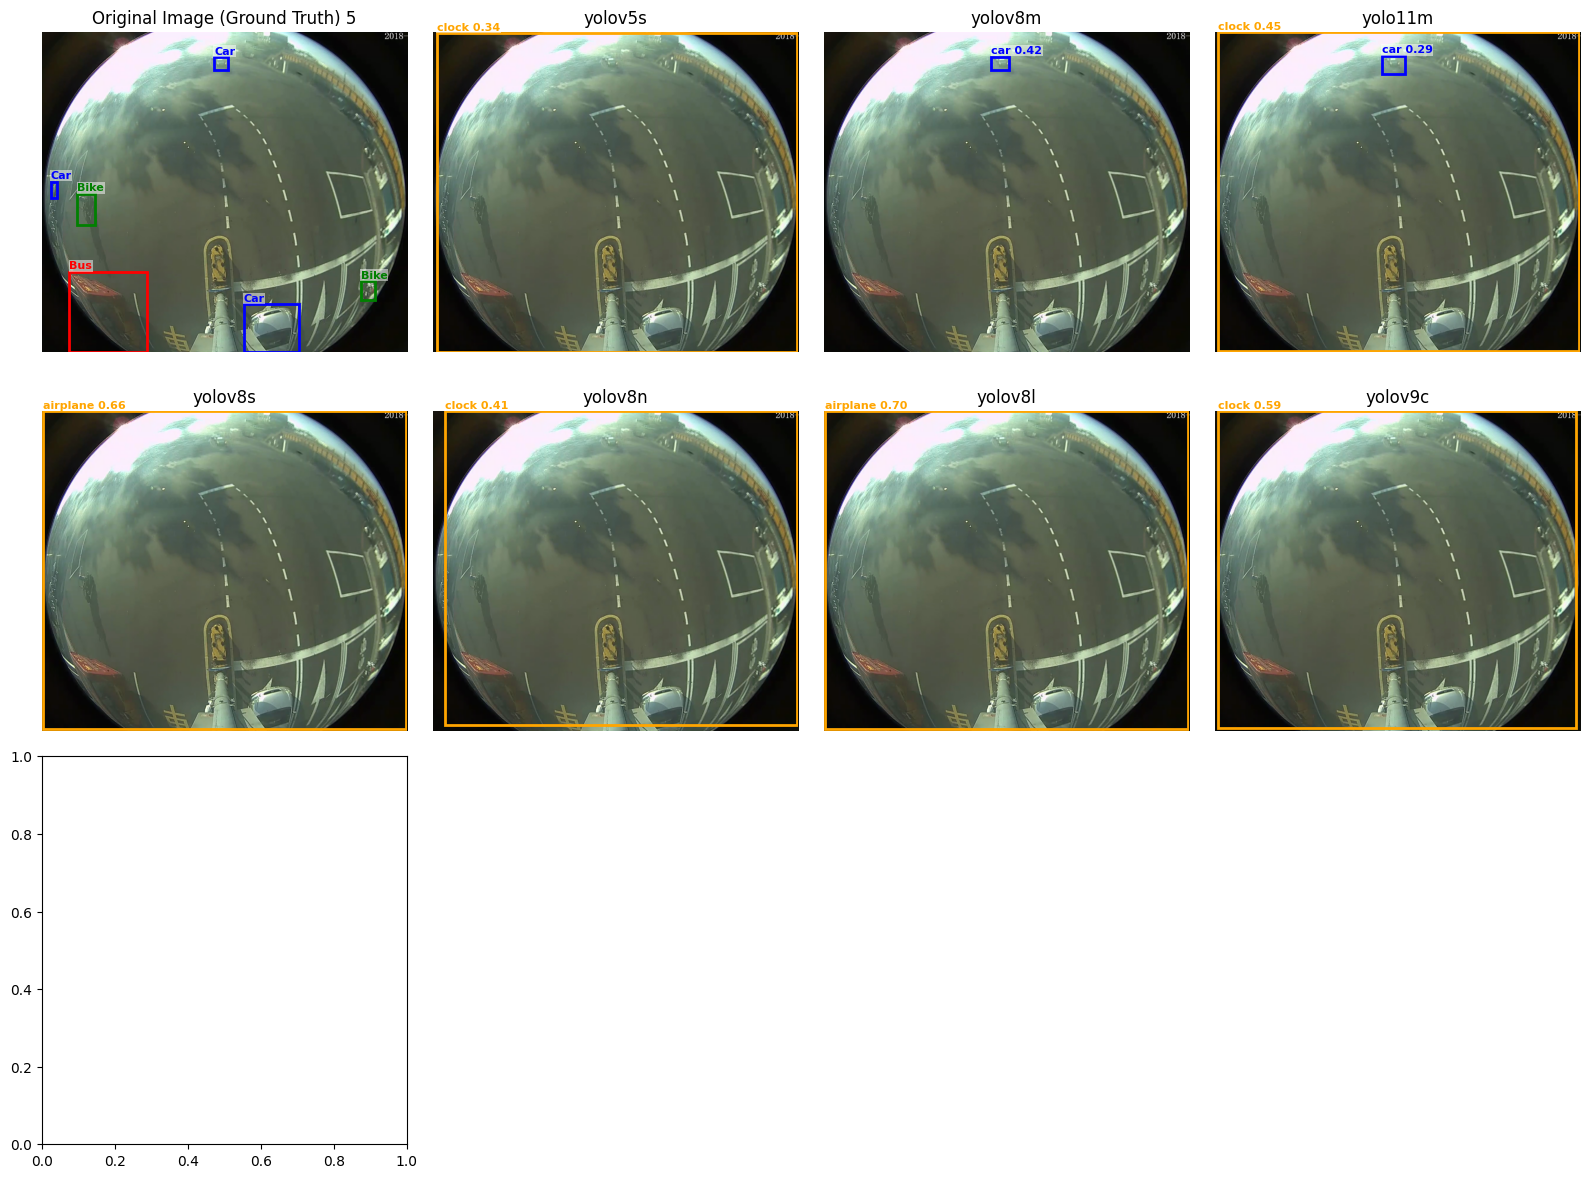

In [78]:
images_per_row = 4

rows = (total_plots + images_per_row - 1) // images_per_row  
for i, image in enumerate(sample_images_pil):
    print(f"i: {i}")
    fig, axes = plt.subplots(rows, images_per_row, figsize=(4 * images_per_row, 4 * rows))
    flat_axes = axes.flatten()

    flat_axes[0].imshow(image)
    flat_axes[0].set_title(f"Original Image (Ground Truth) {i}")
    flat_axes[0].axis('off')
    for label in sample_labels_gt[i]:
        print(f"label: {label}")
        bbox = label['bbox']
        class_name = classes[label['category_id']]
        color = colors[label['category_id'] % len(colors)]
        text = f"{class_name}"
        draw_bounding_box(flat_axes[0], bbox, text, color)
    for j, model in enumerate(models):
        draw_bounding_box_yolo(ax=flat_axes[j+1  ], model_name=model['name'], results=model['results'][i])
    
    for plot in range(total_plots, len(flat_axes)):
        flat_axes[plot].axis('off')
    plt.tight_layout()
    plt.tight_layout()
    display(fig)
    plt.close(fig)
